In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [23]:
from graphviz import Digraph


def draw_dot(root):
    def trace(root):
        # builds a set of all nodes and edges in a graph
        nodes, edges = set(), set()

        def build(root):
            if root not in nodes:
                nodes.add(root)
                for child in root.prev:
                    edges.add((child, root))
                    build(child)

        build(root)
        return nodes, edges

    dot = Digraph(graph_attr={'rankdir': 'LR'}, format='svg')

    nodes, edges = trace(root)
    for node in nodes:
        uid = str(id(node))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name=uid,
                 label="{ %s | data %.3f | grad %.3f}" % (
                     node.name, node.val, node.grad),
                 shape='record')

        if node.op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name=uid + node.op, label=node.op)
            # and connect this node to it
            dot.edge(uid + node.op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2.op)

    return dot


In [39]:
from __future__ import annotations
from cmath import isfinite
from typing import Union
import uuid


class Scalar:

    def __init__(self,
                 val: Union[float, int],
                 name: str = '',
                 prev: tuple[Scalar] = (),
                 op: str = '') -> None:

        assert isinstance(
            val, (float, int)), "val must be a float or an integer"

        self.val = val
        self.name = name
        self.grad = 0.0
        self.prev = set(prev)
        self.op = op

    def __add__(self, other) -> Scalar:
        other = other if isinstance(other, Scalar) else Scalar(other)
        return Scalar(self.val + other.val, prev=(self, other), op='+')

    def __mul__(self, other) -> Scalar:
        other = other if isinstance(other, Scalar) else Scalar(other)
        return Scalar(self.val * other.val, prev=(self, other), op='*')

    def __radd__(self, other) -> Scalar:
        return self + other

    def __rmul__(self, other) -> Scalar:
        return self * other

    def __neg__(self) -> Scalar:
        return self * -1

    def __sub__(self, other) -> Scalar:
        return self + (-other)

    def __rsub__(self, other) -> Scalar:
        return other + (-self)

    def __pow__(self, other) -> Scalar:
        assert isinstance(
            other, (float, int)), 'class Scalar can only be raised by the power of an integer or a float'
        return Scalar(math.pow(self.val, other), prev=(self, ), op=f'**{other}')

    def __truediv__(self, other) -> Scalar:
        return self * other ** -1

    def __rtruediv__(self, other) -> Scalar:
        return other * self ** -1

    def __repr__(self) -> str:
        return f'Scalar(val={self.val}, grad={self.grad})'


In [40]:
a = Scalar(2.0, name='a')
b = Scalar(-3.0, name='b')
c = Scalar(10.0, name='c')
e = a * b
e.name = 'e'
d = e + c
d.name = 'd'
f = Scalar(-2.0, name='f')
L = d * f
L.name = 'L'
L


Scalar(val=-8.0, grad=0.0)

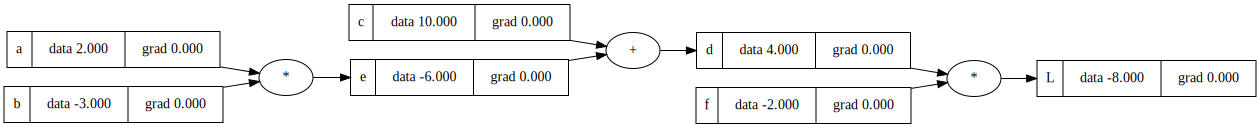

In [41]:
draw_dot(L)


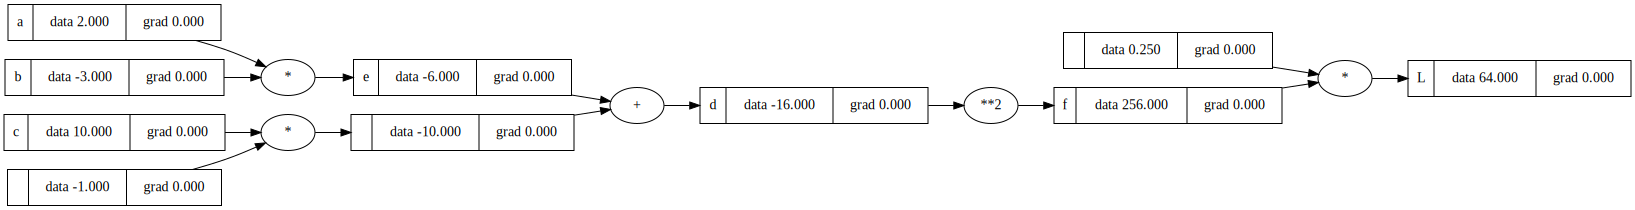

In [42]:
a = Scalar(2.0, name='a')
b = Scalar(-3.0, name='b')
c = Scalar(10.0, name='c')
e = a * b
e.name = 'e'
d = e - c
d.name = 'd'

f = d ** 2
f.name = 'f'
# L = f / 5
L = f / 4
L.name = 'L'
# L

draw_dot(L)

In [34]:
def lol():
    h = 0.00001

    a = Scalar(2.0, name='a')
    b = Scalar(-3.0, name='b')
    c = Scalar(10.0, name='c')
    e = a * b
    e.name = 'e'
    d = e + c
    d.name = 'd'
    f = Scalar(-2.0, name='f')
    L = d / f
    L.name = 'L'
    d1 = L

    a = Scalar(2.0, name='a')
    b = Scalar(-3.0, name='b')
    c = Scalar(10.0, name='c') 
    e = a * b
    e.name = 'e'
    d = e + c + h
    d.name = 'd'
    f = Scalar(-2.0, name='f') + h
    L = d / f
    L.name = 'L'
    d2 = L

    grad = (d2 - d1) / h

    return grad


lol()


Scalar(val=-1.5000075000326516)